# Ejercicio de Procesameinto de texto

Este ejercicio trata de procesar los datos de dialogos de los simpsons

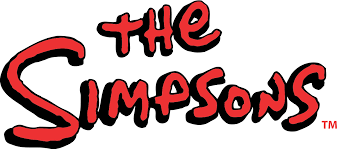

Vamos a procesar los mensajes de cada personaje, y en última instancia vamos a intentar determinar dada una frase, inferir quien la puede haber dicho

## Lectura de datos

### Conexión a Drive

In [6]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
PATH_DATA= '/content/drive/MyDrive/Colab Notebooks/nlp_introduction_course/data'
DATASET_NAME = 'simpsons_dataset.csv'

Mounted at /content/drive


Leectura de datos y extración a un dataframe de Pandas

In [7]:
import pandas as pd
df = pd.read_csv(f'{PATH_DATA}/{DATASET_NAME}', names=["character", "text"])

### Exploración de los *datos*

Vemos la estructura básica del dataframe para entenderlo

In [8]:
df.head()

,character,text
0,raw_character_text,spoken_words
1,Miss Hoover,"No, actually, it was a little of both. Sometim..."
2,Lisa Simpson,Where's Mr. Bergstrom?
3,Miss Hoover,I don't know. Although I'd sure like to talk t...
4,Lisa Simpson,That life is worth living.


Basicamente hay 2 columnas 

Podemos ver que hay valores nulos (función isnull de dataframe)

In [ ]:
# Rellenar con una visualización de los valores nulos

Y debemos eliminarlos.

Podemos hacer uso de la función de pandas **dropna**

In [1]:
# Rellenar con la eliminación de los valores nulos

Ahora vamos a ver cuantas frases dicen que personajes

In [ ]:
df['character'].describe()


count            131854
unique             6273
top       Homer Simpson
freq              27850
Name: character, dtype: object

Podemos var que hay 6273 perosnajes unicos, y el que mas frases parece tener es Homer Simpson, que tiene 27850 frases.

In [ ]:
df.groupby('character')['character'].agg(count='count').describe()

,count
count,6273.000000
mean,21.019289
std,452.222376
min,1.000000
25%,1.000000
50%,2.000000
75%,4.000000
max,27850.000000


Como conclusión podemos extraer que la mayor parte de los personajes, tienen **muy poquitos ejemplos**.

Para trabajar con el dataset, lo que haremos es quedarnos con los datos de dialogos, para personajes con mas de un cierto **threshold** de frases, en este caso **10.000**

In [ ]:
threshold = 10000
df_filtered = df[df['character'].isin(df['character'].value_counts()[df['character'].value_counts()>threshold].index)].reset_index()

In [ ]:
df_filtered.groupby('character')['character'].agg(count='count')

,index,character,text
0,2,Lisa Simpson,Where's Mr. Bergstrom?
1,4,Lisa Simpson,That life is worth living.
2,8,Bart Simpson,Victory party under the slide!
3,9,Lisa Simpson,Mr. Bergstrom! Mr. Bergstrom!
4,11,Lisa Simpson,Do you know where I could find him?
...,...,...,...
64768,131843,Marge Simpson,No.
64769,131844,Lisa Simpson,Does Bart have to be there?
64770,131845,Marge Simpson,Yes.
64771,131846,Lisa Simpson,Can we do it this week?


Mostramos el numero de frases por personaje despues del filtrado

Podemos usar la funcion groupby de pandas

In [ ]:
# Rellenar con la cuenta de frases por los personajes

,count
character,
Bart Simpson,12995
Homer Simpson,27850
Lisa Simpson,10756
Marge Simpson,13172


Como vemos esto nos deja solo con los personajes de Bart, Homer, Lisa y Marge....

In [ ]:
from matplotlib import pyplot as plt

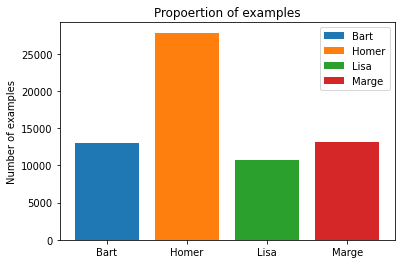

In [ ]:
plt.bar('Bart',df_filtered[df_filtered['character'] == 'Bart Simpson'].shape[0], label="Bart")
plt.bar('Homer',df_filtered[df_filtered['character'] == 'Homer Simpson'].shape[0], label="Homer")
plt.bar('Lisa',df_filtered[df_filtered['character'] == 'Lisa Simpson'].shape[0], label="Lisa")
plt.bar('Marge',df_filtered[df_filtered['character'] == 'Marge Simpson'].shape[0], label="Marge")
plt.legend()
plt.ylabel('Number of examples')
plt.title('Propoertion of examples')
plt.show()

### Procesar los dialogos

Eliminar signos de puntuación

In [ ]:
# Rellenar con funcion para eliminar los signos de puntuación de un texto

Eliminar caracteres númericos

In [ ]:
# Rellenar con función para eliminar caracteres númericos

Eliminar Stop Words

In [ ]:
# Rellenar con funcion para eliminar Stop Words

Stemming

In [ ]:
# Rellenar con funcion para hacer stemming de las palabras

Aplicar todas las operaciones para limpiar el texto

In [ ]:
# Rellenar con función que usando todas las funciones anteriores, limpie el texto

Aplicar transformaciones sobre el dataframe

In [ ]:
df_filtered['text_processed'] = df_filtered['text'].apply(#Nombre de la funcion de limpieza)

Eliminamos textos con menos de 10 palabras

In [ ]:
n_palabras = 10
df_filtered = df_filtered[df_filtered['text_processed'].str.len()>=n_palabras]

In [ ]:
df_filtered.shape

(49513, 4)

Como vemos nuestro texto se ha reducido considerablemente

### Creación del vector de palabras para el entrenamiento

In [3]:
from sklearn.feature_extraction.text import CountVectorizer # Esto nos servira para contar la frecuencia de apararición de las palabras

In [4]:
cv = CountVectorizer()
# X = Obtener para cada frase la lista de palabras y su frecuencia
# y = Etiqueta a predecir

In [ ]:
pd.DataFrame(data=X.toarray(),columns = cv.get_feature_names_out()).head()

,007,07s,10,100,1000,10000,1015,10201,1030,104,...,zuckerberg,zuh,zum,zuman,zur,zydeco,zz,zzebra,zzzapp,ãºna
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Entrenamos el modelo

Separación en conjuntos de entrenamiento y test

In [ ]:
from sklearn.model_selection import train_test_split # Esto nos servira para realziar la división de conjuntos de entrenamiento y de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42) # Vamos a usar 1/3 para test, y 2/3 para entrenamiento. Tambien ponemos una semilla (42), para que siempre produzca los mismos resultados 

In [ ]:
print(f'Tamaño de entrenamiento: {X_train.shape[0]},\tTamaño del vector de palabras: {X_train.shape[1]}')
print(f'Tamaño de test: {X_test.shape[0]},\tTamaño del vector de palabras: {X_test.shape[1]}')

Tamaño de entrenamiento: 33173,	Tamaño del vector de palabras: 18590
Tamaño de test: 16340,	Tamaño del vector de palabras: 18590


Entrenamiento de un modelo de clasificación Naive Bayes

In [ ]:
# Naive Bayes Classifier
from sklearn.naive_bayes import MultinomialNB
# Entrenar modelo MultinomialNB a partir de los datos de entrenamiento X_train e y_train

MultinomialNB()

Precisión para el conjunto de Entrenamiento

In [ ]:
# Accuracy of our Model
print("Accuracy of Model",clf.score(X_train,y_train)*100,"%")

Accuracy of Model 65.76131191028848 %


Precisión para el conjunto de Test

In [ ]:
# Accuracy of our Model
print("Accuracy of Model",clf.score(X_test,y_test)*100,"%")

Accuracy of Model 51.15055079559363 %


Testeamos de forma aleatoria

In [ ]:
class bcolors:
    HEADER = '\033[95m'
    OKBLUE = '\033[94m'
    OKCYAN = '\033[96m'
    OKGREEN = '\033[92m'
    WARNING = '\033[93m'
    FAIL = '\033[91m'
    ENDC = '\033[0m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'

In [ ]:
import random
def mostrar_predicciones_aleatorias(model,cv,df,n):
  for i in range(0,n):
    rindx = random.randrange(0,len(df))
    row = df.iloc[rindx]
    x_row = cv.transform([row['text_processed']]).toarray()
    y_real = row['character']
    y_predicted = clf.predict(x_row)
    print(f"{bcolors.OKBLUE if y_real == y_predicted[0] else bcolors.FAIL} {'-'*100}\nTexto: {row['text']},\nReal: {y_real}\tPredicho: {y_predicted[0]} {bcolors.ENDC}")

In [ ]:
mostrar_predicciones_aleatorias(clf,cv,df_filtered,10)

 ----------------------------------------------------------------------------------------------------
Texto: Come one, come all, Top Hat Theatre is on the air. The most beautiful women in the world. Just fifty-cents. I am your host, Bart Simpson. You must be at least eight years old to enter.,
Real: Bart Simpson	Predicho: Homer Simpson 
 ----------------------------------------------------------------------------------------------------
Texto: How could you do this to me, Moe? This bar was going under and it was the drink I invented that saved it.,
Real: Homer Simpson	Predicho: Homer Simpson 
 ----------------------------------------------------------------------------------------------------
Texto: We've all read the terms and conditions, Milhouse.,
Real: Bart Simpson	Predicho: Bart Simpson 
 ----------------------------------------------------------------------------------------------------
Texto: Silence, Seymour. We're in charge now. Your reign of fussiness is over.,
Real: Bart Sim